# Prepare Data

## Installation

In [46]:
#%pip install --upgrade numpy
#%pip install --upgrade pandas
#%pip install --upgrade sklearn
#%pip install --upgrade scipy
#%pip install --upgrade seaborn

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy

#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [48]:
FEATURES_FILE = './data/stoxx_features.csv'
#LABELS_FILE = './data/stoxx_labels.csv'

DATA_FILE = './data/stoxx_data.csv'

## Load features and labels

In [49]:
# -- STOXX --
df = pd.read_csv(FEATURES_FILE, index_col='ticker')
print(df.shape)

(567, 31)


## Missing values

### Check columns with missing values

In [50]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isna().sum().sort_values(ascending = False)

fiveYearAvgDividendYield    370
earningsGrowth              289
pegRatio                    272
freeCashflow                249
recommendationMean          248
dividendYield               247
debtToEquity                246
currentRatio                243
quickRatio                  243
trailingPE                  240
enterpriseToEbitda          239
payoutRatio                 229
numberOfAnalystOpinions     222
forwardEps                  221
revenueGrowth               219
returnOnEquity              219
forwardPE                   217
returnOnAssets              216
overallRisk                 214
beta                        212
enterpriseToRevenue         208
priceToBook                 208
profitMargins               203
ebitdaMargins               203
sector                      203
enterpriseValue             203
bookValue                   203
trailingEps                 203
industry                    203
shortName                   197
previousClose               196
dtype: i

### Drop all columns with more than 3500 missing values

In [51]:
df.drop(columns=[
    # string columns (except industry)
    'shortName',
    'sector',
    #'industry',
    # columns with more than 3500 NaNs
    'fiveYearAvgDividendYield',
    'dividendYield',
    'earningsGrowth',
    'pegRatio',
    'trailingPE',
    'overallRisk',
    # also
    'bookValue'
], inplace=True)

### Drop all rows with missing values

In [52]:
df.dropna(axis=0, inplace=True)
len(df)

234

In [53]:
df['trailingEps'] = df['trailingEps'] / df['previousClose']
df['forwardEps'] = df['forwardEps'] / df['previousClose']
df.insert(loc = 9, column = 'priceToFcf', value = df['enterpriseValue'] / df['freeCashflow'])

In [54]:
d = df.describe()
d

,recommendationMean,numberOfAnalystOpinions,beta,previousClose,trailingEps,forwardEps,forwardPE,priceToBook,priceToFcf,enterpriseToRevenue,...,profitMargins,revenueGrowth,payoutRatio,enterpriseValue,freeCashflow,debtToEquity,returnOnAssets,returnOnEquity,quickRatio,currentRatio
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000,234.000000,234.000000
mean,2.404701,15.807692,0.906913,661.995147,0.047919,0.080391,93.490430,4.453673,2.896859,3.566863,...,0.092600,0.046462,0.518906,4.685747e+10,-6.312342e+08,95.359949,0.054142,0.153604,1.402295,1.983765
std,0.428316,6.025819,0.447297,6804.853789,0.190553,0.054984,1183.518952,8.931031,517.489395,5.854106,...,0.172933,0.270320,0.487170,8.842148e+10,1.654902e+10,115.901490,0.044804,0.162026,3.836527,4.276500
min,1.600000,1.000000,-0.112414,0.277500,-2.157736,-0.088540,-327.101440,0.243281,-7203.468780,-2.692000,...,-1.413600,-0.924000,0.000000,-2.554367e+10,-2.135282e+11,0.224000,-0.102940,-0.828100,0.009000,0.097000
25%,2.100000,12.000000,0.577592,26.255000,0.034503,0.048518,9.732464,1.225404,6.756929,0.913500,...,0.043320,-0.059750,0.265275,8.022565e+09,9.568056e+07,38.135250,0.026600,0.090705,0.570000,0.955500
50%,2.300000,16.000000,0.919568,64.400000,0.055383,0.070881,13.784332,2.314476,20.358816,1.691000,...,0.078535,0.047000,0.446500,1.842311e+10,4.318476e+08,71.974000,0.047830,0.135585,0.811500,1.220500
75%,2.700000,20.000000,1.198713,147.050000,0.088189,0.099185,19.779404,3.931221,37.618412,3.816500,...,0.144310,0.129250,0.683725,4.415670e+10,1.438728e+09,117.547250,0.071655,0.201958,1.100000,1.747500
max,3.900000,31.000000,2.181680,103400.000000,0.479777,0.438544,18114.285000,87.617470,1915.671614,48.096000,...,0.881600,2.299000,4.103700,9.614860e+11,3.494345e+10,1162.434000,0.245770,1.065420,49.029000,50.685000


In [55]:
df.drop(columns=['previousClose', 'enterpriseValue', 'freeCashflow'], inplace=True)

In [56]:
filtered_df = df[
    #(df['recommendationMean'] <= 2) &
    #(df['numberOfAnalystOpinions'] >= 2) &
    (df['beta'] >= d.loc['50%','beta']) &
    #(df['trailingEps'] >= d.loc['50%','trailingEps']) &
    #(df['forwardEps'] >= d.loc['50%','forwardEps']) &
    (df['forwardPE'] <= d.loc['50%','forwardPE']) &
    (df['priceToBook'] <= d.loc['50%','priceToBook']) &
    #(df['priceToFcf'] <= d.loc['50%','priceToFcf']) &
    #(df['enterpriseToRevenue'] >= d.loc['50%','enterpriseToRevenue']) &
    #(df['enterpriseToEbitda'] >= d.loc['50%','enterpriseToEbitda']) &
    #(df['ebitdaMargins'] >= d.loc['50%','ebitdaMargins']) &
    (df['profitMargins'] >= d.loc['50%','profitMargins']) &
    (df['revenueGrowth'] >= d.loc['50%','revenueGrowth'])
    #(df['payoutRatio'] >= d.loc['50%','payoutRatio']) &
    #(df['debtToEquity'] <= d.loc['50%','debtToEquity']) &
    #(df['returnOnAssets'] >= d.loc['50%','returnOnAssets']) &
    #(df['returnOnEquity'] >= d.loc['50%','returnOnEquity']) &
    #(df['quickRatio'] >= d.loc['50%','quickRatio']) &
    #(df['currentRatio'] >= d.loc['50%','currentRatio']) 
    #(df['zacks_rank'] <= 2)
]
filtered_df

,industry,recommendationMean,numberOfAnalystOpinions,beta,trailingEps,forwardEps,forwardPE,priceToBook,priceToFcf,enterpriseToRevenue,enterpriseToEbitda,ebitdaMargins,profitMargins,revenueGrowth,payoutRatio,debtToEquity,returnOnAssets,returnOnEquity,quickRatio,currentRatio
ticker,,,,,,,,,,,,,,,,,,,,
AALB.AS,Specialty Industrial Machinery,2.0,8.0,1.531415,0.076430,0.088188,11.193939,1.749550,407.087632,1.486,8.627,0.17221,0.09518,0.063,0.3895,35.610,0.06145,0.13980,0.509,1.420
BUCN.SW,Specialty Industrial Machinery,2.3,8.0,0.972747,0.091080,0.079966,12.413793,2.097116,41.642177,0.934,6.361,0.14681,0.10011,0.091,0.3538,8.021,0.10315,0.22928,1.115,2.193
KGH.WA,Copper,3.1,10.0,1.446513,0.137262,0.159443,6.181606,0.661394,-7.841277,0.792,5.091,0.15555,0.08814,0.066,0.1976,21.823,0.03627,0.09991,0.360,1.493
LI.PA,REIT—Retail,3.0,17.0,1.729371,0.061001,0.100547,9.824267,0.801447,36.379229,10.603,16.717,0.63426,0.26520,0.048,1.1724,76.251,0.02926,0.04083,0.197,0.299
PUB.PA,Advertising Agencies,2.1,17.0,0.949280,0.069781,0.099829,10.079886,1.926495,11.969407,1.372,8.258,0.16619,0.08865,0.085,0.5631,69.827,0.03936,0.14296,0.903,0.920
TEN.MI,Oil & Gas Equipment & Services,2.1,10.0,1.628311,0.156914,0.145145,6.822072,1.144228,11.782931,1.109,3.286,0.33745,0.24748,0.455,0.1645,5.139,0.15844,0.25727,2.204,3.708
WLN.PA,Software—Infrastructure,2.2,19.0,1.152157,0.024057,0.094278,10.337931,0.902849,4.306613,2.616,14.340,0.18241,0.09210,0.110,0.0000,33.956,0.02425,0.02249,0.359,1.062


## Outliers

- https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
- https://towardsdatascience.com/mixed-integer-linear-programming-formal-definition-and-solution-space-6b3286d54892

In [57]:
df.columns

Index(['industry', 'recommendationMean', 'numberOfAnalystOpinions', 'beta',
       'trailingEps', 'forwardEps', 'forwardPE', 'priceToBook', 'priceToFcf',
       'enterpriseToRevenue', 'enterpriseToEbitda', 'ebitdaMargins',
       'profitMargins', 'revenueGrowth', 'payoutRatio', 'debtToEquity',
       'returnOnAssets', 'returnOnEquity', 'quickRatio', 'currentRatio'],
      dtype='object')

-4000.0 4000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x281186700>,
 'caps': [<matplotlib.lines.Line2D at 0x281186c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2811863a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2811921c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x281192460>],
 'means': []}

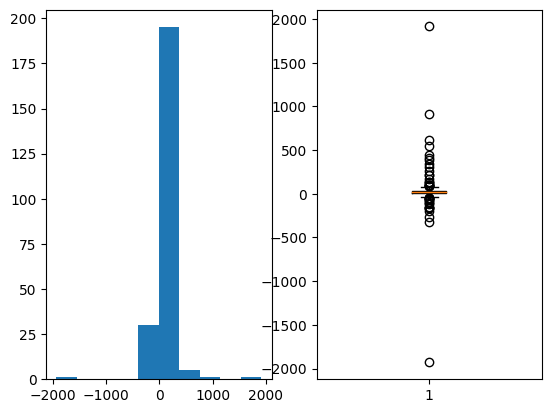

In [58]:
col = 'priceToFcf'
q_low = -4000.0 #df[col].quantile(0.005)
q_hi  = 4000.0 #df[col].quantile(0.995)
print(q_low, q_hi)
df_filtered = df[(df[col] >= q_low) & (df[col] <= q_hi)]
#df_filtered = df
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df_filtered[[col]], bins=10)
ax2.boxplot(df_filtered[[col]])

In [59]:
sub_df=df[
    # (df['recommendationMean'] >=0) &
    # (df['numberOfAnalystOpinions'] >= 0) &
    # (df['beta'] >= 0) &
    (df['trailingEps'] > -100) &
    # (df['forwardEps'] >= 0) &
    (df['forwardPE'] >= -500) & (df['forwardPE'] <= 500) &
    (df['priceToBook'] <= 200) &
    (df['enterpriseToRevenue'] <= 1000) &
    (df['enterpriseToEbitda'] >= -1000) & (df['enterpriseToEbitda'] <= 1000) &
    # (df['ebitdaMargins'] >= 0) &
    # (df['profitMargins'] >= 0) &
    (df['revenueGrowth'] <= 10) &
    (df['payoutRatio'] <= 20) &
    (df['debtToEquity'] <= 400) &
    # (df['returnOnAssets'] >= 0) &
    # (df['returnOnEquity'] >= 0)
    (df['returnOnEquity'] >= -10) & (df['returnOnEquity'] <= 10) &
    (df['quickRatio'] <= 25) &
    (df['currentRatio'] <= 25) &
    # (df['zacks_rank'] <= 2) &
    (df['priceToFcf'] >= -4000) & (df['priceToFcf'] <= 4000) 
]
sub_df

,industry,recommendationMean,numberOfAnalystOpinions,beta,trailingEps,forwardEps,forwardPE,priceToBook,priceToFcf,enterpriseToRevenue,enterpriseToEbitda,ebitdaMargins,profitMargins,revenueGrowth,payoutRatio,debtToEquity,returnOnAssets,returnOnEquity,quickRatio,currentRatio
ticker,,,,,,,,,,,,,,,,,,,,
A2A.MI,Utilities—Diversified,2.0,6.0,1.129068,0.071770,0.089713,11.139999,1.348668,27.151045,0.479,6.820,0.07025,0.01659,-0.332,0.7746,153.860,0.02384,0.08682,0.840,1.146
AAK.ST,Packaged Foods,2.2,10.0,0.477668,0.048152,0.053618,18.563107,2.989275,38.617077,1.083,13.128,0.08253,0.04781,-0.106,0.2973,35.962,0.06541,0.15966,0.993,1.833
AALB.AS,Specialty Industrial Machinery,2.0,8.0,1.531415,0.076430,0.088188,11.193939,1.749550,407.087632,1.486,8.627,0.17221,0.09518,0.063,0.3895,35.610,0.06145,0.13980,0.509,1.420
ABBN.SW,Electrical Equipment & Parts,2.6,21.0,0.981453,0.048615,0.048308,20.630571,4.707848,60.360061,2.181,13.105,0.16642,0.10988,0.126,0.4998,70.772,0.07093,0.27477,0.699,1.136
AC.PA,Lodging,2.1,18.0,1.293716,0.037341,0.059199,16.569231,2.078348,32.725909,2.226,13.723,0.16221,0.12610,0.392,0.0000,62.384,0.03692,0.11611,0.984,1.302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WKL.AS,Specialty Business Services,2.4,14.0,0.315291,0.036563,0.043876,22.593748,13.280675,26.396325,5.255,18.048,0.29114,0.18842,0.048,0.4330,179.181,0.08593,0.45360,0.732,0.754
WLN.PA,Software—Infrastructure,2.2,19.0,1.152157,0.024057,0.094278,10.337931,0.902849,4.306613,2.616,14.340,0.18241,0.09210,0.110,0.0000,33.956,0.02425,0.02249,0.359,1.062
YAR.OL,Agricultural Inputs,2.8,19.0,0.406131,0.097362,0.101598,9.725411,13.823936,57.422142,5.305,44.179,0.12008,0.04949,-0.383,1.3324,62.342,0.05689,0.13077,0.648,1.725


In [67]:
sub_df.loc['WLN.PA',:]

recommendationMean          2.200000
numberOfAnalystOpinions    19.000000
beta                        0.707107
trailingEps                 0.707107
forwardEps                  0.707107
forwardPE                   0.707107
priceToBook                 0.707107
priceToFcf                  0.707107
enterpriseToRevenue        -0.707107
enterpriseToEbitda         -0.707107
ebitdaMargins               0.707107
profitMargins               0.707107
revenueGrowth              -0.707107
payoutRatio                 0.000000
debtToEquity               -0.707107
returnOnAssets             -0.707107
returnOnEquity             -0.707107
quickRatio                 -0.707107
currentRatio               -0.707107
Name: WLN.PA, dtype: float64

## Scale by industry

Metrics should be compared between industry pairs

In [62]:
# Z-score by industry
industries = sub_df.industry.unique()
#columns = ['industry', 'recommendationMean', 'numberOfAnalystOpinions', 'zacks_rank']
columns = ['industry', 'recommendationMean', 'numberOfAnalystOpinions']
#ind = industries[0]
for ind in industries:
    ind_mean = sub_df[sub_df['industry'] == ind].drop(columns=columns).mean()
    ind_std = sub_df[sub_df['industry'] == ind].drop(columns=columns).std()
    for c in ind_mean.index:
        mean = ind_mean[c]
        std = ind_std[c] or 0.0001 # Beware zero values!
        sub_df.loc[sub_df['industry'] == ind, c] = sub_df.loc[sub_df['industry'] == ind, c].subtract(mean).div(std)
sub_df.drop(columns=['industry'], inplace=True)
#sub_df.isna().sum()
sub_df.dropna(inplace=True)
sub_df.describe()

/var/folders/wc/l9y803l95kzbyc5wb7_4wnmw0000gn/T/ipykernel_32106/1946144385.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=['industry'], inplace=True)
/var/folders/wc/l9y803l95kzbyc5wb7_4wnmw0000gn/T/ipykernel_32106/1946144385.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.dropna(inplace=True)


,recommendationMean,numberOfAnalystOpinions,beta,trailingEps,forwardEps,forwardPE,priceToBook,priceToFcf,enterpriseToRevenue,enterpriseToEbitda,ebitdaMargins,profitMargins,revenueGrowth,payoutRatio,debtToEquity,returnOnAssets,returnOnEquity,quickRatio,currentRatio
count,198.000000,198.000000,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02
mean,2.398485,16.237374,-1.525155e-16,-1.794300e-17,-3.140025e-17,-3.364312e-17,2.691450e-17,-2.130731e-17,3.364312e-17,1.794300e-17,-2.525477e-15,6.952912e-17,-1.738228e-17,-7.177199e-17,-1.256010e-16,8.971499e-18,8.971499e-18,-8.971499e-17,8.074349e-17
std,0.437631,6.047126,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.490066e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01
min,1.600000,3.000000,-2.168302e+00,-2.415995e+00,-1.877520e+00,-2.372792e+00,-1.620925e+00,-2.028056e+00,-2.333773e+00,-1.513356e+00,-2.279781e+00,-1.923270e+00,-2.244008e+00,-1.808180e+00,-1.708245e+00,-1.601778e+00,-1.869350e+00,-1.495579e+00,-1.717050e+00
25%,2.100000,12.000000,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01
50%,2.300000,16.000000,-2.693079e-02,-9.138189e-04,-1.414550e-01,-1.655896e-01,-2.407439e-01,-1.634611e-01,-2.011785e-01,-2.180294e-01,-4.691145e-02,-7.926254e-02,-7.046108e-02,-1.167280e-01,-1.533205e-01,-1.802949e-01,-9.261499e-02,-2.188119e-01,-1.891227e-01
75%,2.675000,20.750000,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01
max,3.900000,31.000000,2.095284e+00,2.301593e+00,2.325855e+00,2.831924e+00,2.882600e+00,3.268869e+00,3.324306e+00,2.946142e+00,2.439326e+00,2.731283e+00,2.343656e+00,2.321187e+00,2.662234e+00,2.616270e+00,2.123799e+00,2.634187e+00,2.411253e+00


## Inverse columns

Inverse some values so higher is always better

In [63]:
inversed_cols = ['forwardPE', 'priceToBook', 'priceToFcf', 'debtToEquity']
sub_df.loc[:, inversed_cols] = -sub_df[inversed_cols]

In [64]:
d = sub_df.describe()
d

,recommendationMean,numberOfAnalystOpinions,beta,trailingEps,forwardEps,forwardPE,priceToBook,priceToFcf,enterpriseToRevenue,enterpriseToEbitda,ebitdaMargins,profitMargins,revenueGrowth,payoutRatio,debtToEquity,returnOnAssets,returnOnEquity,quickRatio,currentRatio
count,198.000000,198.000000,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02
mean,2.398485,16.237374,-1.525155e-16,-1.794300e-17,-3.140025e-17,3.364312e-17,-2.691450e-17,2.130731e-17,3.364312e-17,1.794300e-17,-2.525477e-15,6.952912e-17,-1.738228e-17,-7.177199e-17,1.256010e-16,8.971499e-18,8.971499e-18,-8.971499e-17,8.074349e-17
std,0.437631,6.047126,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.490066e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01,8.549646e-01
min,1.600000,3.000000,-2.168302e+00,-2.415995e+00,-1.877520e+00,-2.831924e+00,-2.882600e+00,-3.268869e+00,-2.333773e+00,-1.513356e+00,-2.279781e+00,-1.923270e+00,-2.244008e+00,-1.808180e+00,-2.662234e+00,-1.601778e+00,-1.869350e+00,-1.495579e+00,-1.717050e+00
25%,2.100000,12.000000,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01
50%,2.300000,16.000000,-2.693079e-02,-9.138189e-04,-1.414550e-01,1.655896e-01,2.407439e-01,1.634611e-01,-2.011785e-01,-2.180294e-01,-4.691145e-02,-7.926254e-02,-7.046108e-02,-1.167280e-01,1.533205e-01,-1.802949e-01,-9.261499e-02,-2.188119e-01,-1.891227e-01
75%,2.675000,20.750000,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01
max,3.900000,31.000000,2.095284e+00,2.301593e+00,2.325855e+00,2.372792e+00,1.620925e+00,2.028056e+00,3.324306e+00,2.946142e+00,2.439326e+00,2.731283e+00,2.343656e+00,2.321187e+00,1.708245e+00,2.616270e+00,2.123799e+00,2.634187e+00,2.411253e+00


In [65]:
sub_df.to_csv(DATA_FILE, index=True, index_label='ticker')

## Filtering

In [66]:
filtered_df = sub_df[
    #(sub_df['recommendationMean'] <= 2) &
    #(sub_df['numberOfAnalystOpinions'] >= 2) &
    #(sub_df['beta'] >= 0) &
    #(sub_df['trailingEps'] >= 0) &
    #(sub_df['forwardEps'] >= 0) &
    (sub_df['forwardPE'] >= 0) &
    #(sub_df['priceToBook'] >= 0) &
    #(sub_df['priceToFcf'] >= 0) &
    (sub_df['enterpriseToRevenue'] >= 0) &
    (sub_df['enterpriseToEbitda'] >= 0) &
    (sub_df['ebitdaMargins'] >= 0) &
    (sub_df['profitMargins'] >= 0) &
    (sub_df['revenueGrowth'] >= 0) &
    (sub_df['debtToEquity'] >= 0) &
    #(sub_df['returnOnAssets'] >= 0) &
    #(sub_df['returnOnEquity'] >= 0) &
    (sub_df['quickRatio'] >= 0) &
    (sub_df['currentRatio'] >= 0) 
    #(sub_df['zacks_rank'] <= 2)
]
filtered_df

,recommendationMean,numberOfAnalystOpinions,beta,trailingEps,forwardEps,forwardPE,priceToBook,priceToFcf,enterpriseToRevenue,enterpriseToEbitda,ebitdaMargins,profitMargins,revenueGrowth,payoutRatio,debtToEquity,returnOnAssets,returnOnEquity,quickRatio,currentRatio
ticker,,,,,,,,,,,,,,,,,,,
DSV.CO,2.3,19.0,0.707107,-0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-0.707107,-0.707107,0.707107,0.707107
STMPA.PA,2.3,18.0,-0.857535,0.631468,0.661053,0.603457,-0.485097,1.020798,0.225640,0.416797,0.616874,0.675222,0.570994,-0.157798,0.623665,0.792951,0.704477,1.083932,0.941827
STMN.SW,2.6,16.0,1.258798,-0.302164,-0.283634,0.236629,-0.913525,0.048502,1.196633,1.516700,0.501553,0.751693,0.321208,-0.502251,0.558420,0.905708,0.486421,1.440536,0.389568


## Correlation

<Axes: >

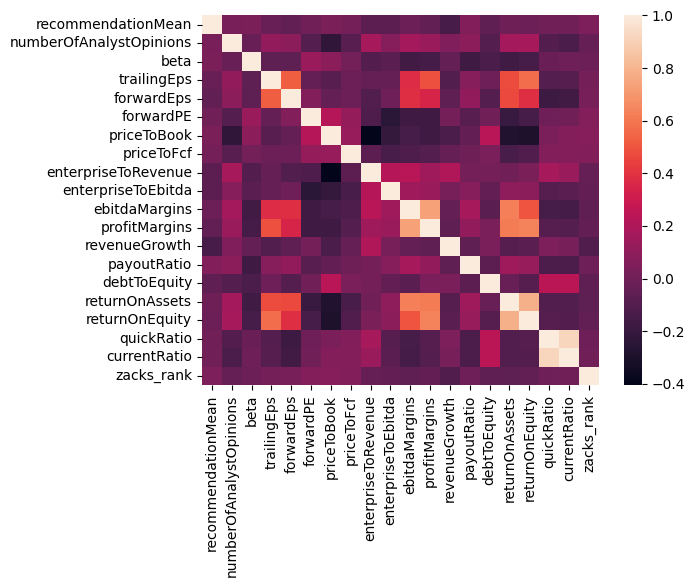

In [ ]:
corr = sub_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## PCA Analysis

In [ ]:
X = sub_df.iloc[:,:-1].to_numpy()
y = sub_df.iloc[:,-1:].to_numpy().ravel()
print(len(X), len(y))

2199 2199



Component 1 
Fraction of total variance explained by this variable: 0.21490659695128406 
 Total fraction of variance explained by the first 1 variable(s): 0.21490659695128406

Component 2 
Fraction of total variance explained by this variable: 0.11044598349739378 
 Total fraction of variance explained by the first 2 variable(s): 0.3253525804486778

Component 3 
Fraction of total variance explained by this variable: 0.09753111139120572 
 Total fraction of variance explained by the first 3 variable(s): 0.42288369183988356

Component 4 
Fraction of total variance explained by this variable: 0.06406135745638417 
 Total fraction of variance explained by the first 4 variable(s): 0.4869450492962677

Component 5 
Fraction of total variance explained by this variable: 0.06173123116596548 
 Total fraction of variance explained by the first 5 variable(s): 0.5486762804622332

Component 6 
Fraction of total variance explained by this variable: 0.056001408083899126 
 Total fraction of variance expl

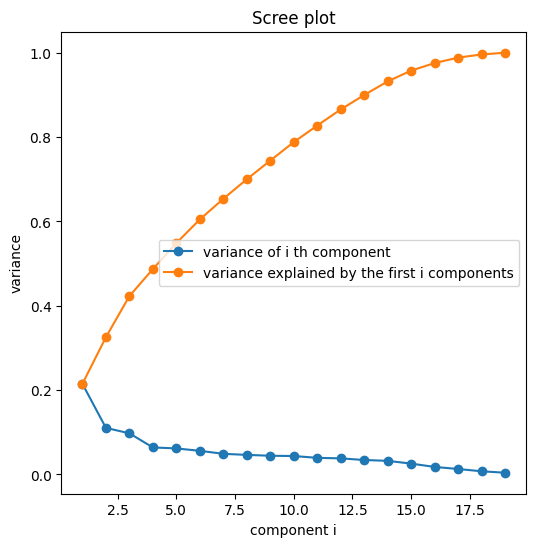

In [ ]:
# First we standardize the data
scaler = StandardScaler().fit(X)
data_scaled = scaler.transform(X)

# then we perform PCA
n = len(X[0])
pca_scaled = PCA(n).fit(data_scaled)
var_scaled = pca_scaled.explained_variance_ratio_
var_scaled_explained = np.zeros(n)
for i in range(n):
    var_scaled_explained[i] = sum(var_scaled[:i+1])

for i in range(n):
    print("\nComponent", i+1 , "\nFraction of total variance explained by this variable:", var_scaled[i],
            "\n Total fraction of variance explained by the first %s variable(s):" % (i +1), var_scaled_explained[i] )

plt.figure(figsize = (6,6))
plt.plot(range(1, len(var_scaled_explained)+1), var_scaled, label = "variance of i th component", marker = "o")
plt.plot(range(1, len(var_scaled_explained)+1), var_scaled_explained, label = "variance explained by the first i components", marker = "o")
plt.xlabel("component i")
plt.ylabel("variance")
plt.title("Scree plot")
plt.legend()
plt.show()

13 components needed to capture more than 90% of the variance